# **Marketing Campaign for Banking Products**


### ***1. Import the datasets and libraries, check datatype,statistical summary, shape, null values etc***





**1.1 Importing the required libraries for EDA** 

---



In [ ]:
import pandas as pd
import numpy as np
import sympy as sp
import seaborn as sns                #visualization 
import matplotlib.pyplot as plt     #visualization 
%matplotlib inline
plt.rcParams["figure.figsize"] =(10,6)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

**1.2 Importing the Datasets**

---



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Bank_Personal_Loan_Modelling.csv to Bank_Personal_Loan_Modelling.csv


In [ ]:
import io
!pip install -q xlrd 
#df=pd.read_excel(io.bytesIO(uploaded['Bank_personal_loan _modelling.xlsx']))
model=pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [ ]:
model.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [ ]:
model.tail(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4990,4991,55,25,58,95023,4,2.00,3,219,0,0,0,0,1
4991,4992,51,25,92,91330,1,1.90,2,100,0,0,0,0,1
4992,4993,30,5,13,90037,4,0.50,3,0,0,0,0,0,0
4993,4994,45,21,218,91801,2,6.67,1,0,0,0,0,1,0
4994,4995,64,40,75,94588,3,2.00,3,0,0,0,0,1,0
4995,4996,29,3,40,92697,1,1.90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.50,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.80,1,0,0,0,0,1,1


 **1.3 Checking the types of data and basic summary stats**

---



In [ ]:
model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
model.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
model.median()

ID                     2500.5
Age                      45.0
Experience               20.0
Income                   64.0
ZIP Code              93437.0
Family                    2.0
CCAvg                     1.5
Education                 2.0
Mortgage                  0.0
Personal Loan             0.0
Securities Account        0.0
CD Account                0.0
Online                    1.0
CreditCard                0.0
dtype: float64

### ***2. Check if you need to clean the data for any of the variables***

***2.1 Cleaning of Data***

---



In [ ]:
model['Experience'].replace( to_replace= -1,value = np.nan,inplace = True )
model['Experience'].replace( to_replace= -2,value = np.nan,inplace = True )
model['Experience'].replace( to_replace= -3,value = np.nan,inplace = True )
model['Experience'].fillna(model['Experience'].median(),inplace=True)

### ***3. Study the data distribution in each attribute and target variable, share your findings.***


**3.1  Number of unique in each column**

---



In [ ]:
for column in model.columns:
   print(f' Unique values in {column} is {len(model[column].unique())}')

 Unique values in ID is 5000
 Unique values in Age is 45
 Unique values in Experience is 44
 Unique values in Income is 162
 Unique values in ZIP Code is 467
 Unique values in Family is 4
 Unique values in CCAvg is 108
 Unique values in Education is 3
 Unique values in Mortgage is 347
 Unique values in Personal Loan is 2
 Unique values in Securities Account is 2
 Unique values in CD Account is 2
 Unique values in Online is 2
 Unique values in CreditCard is 2


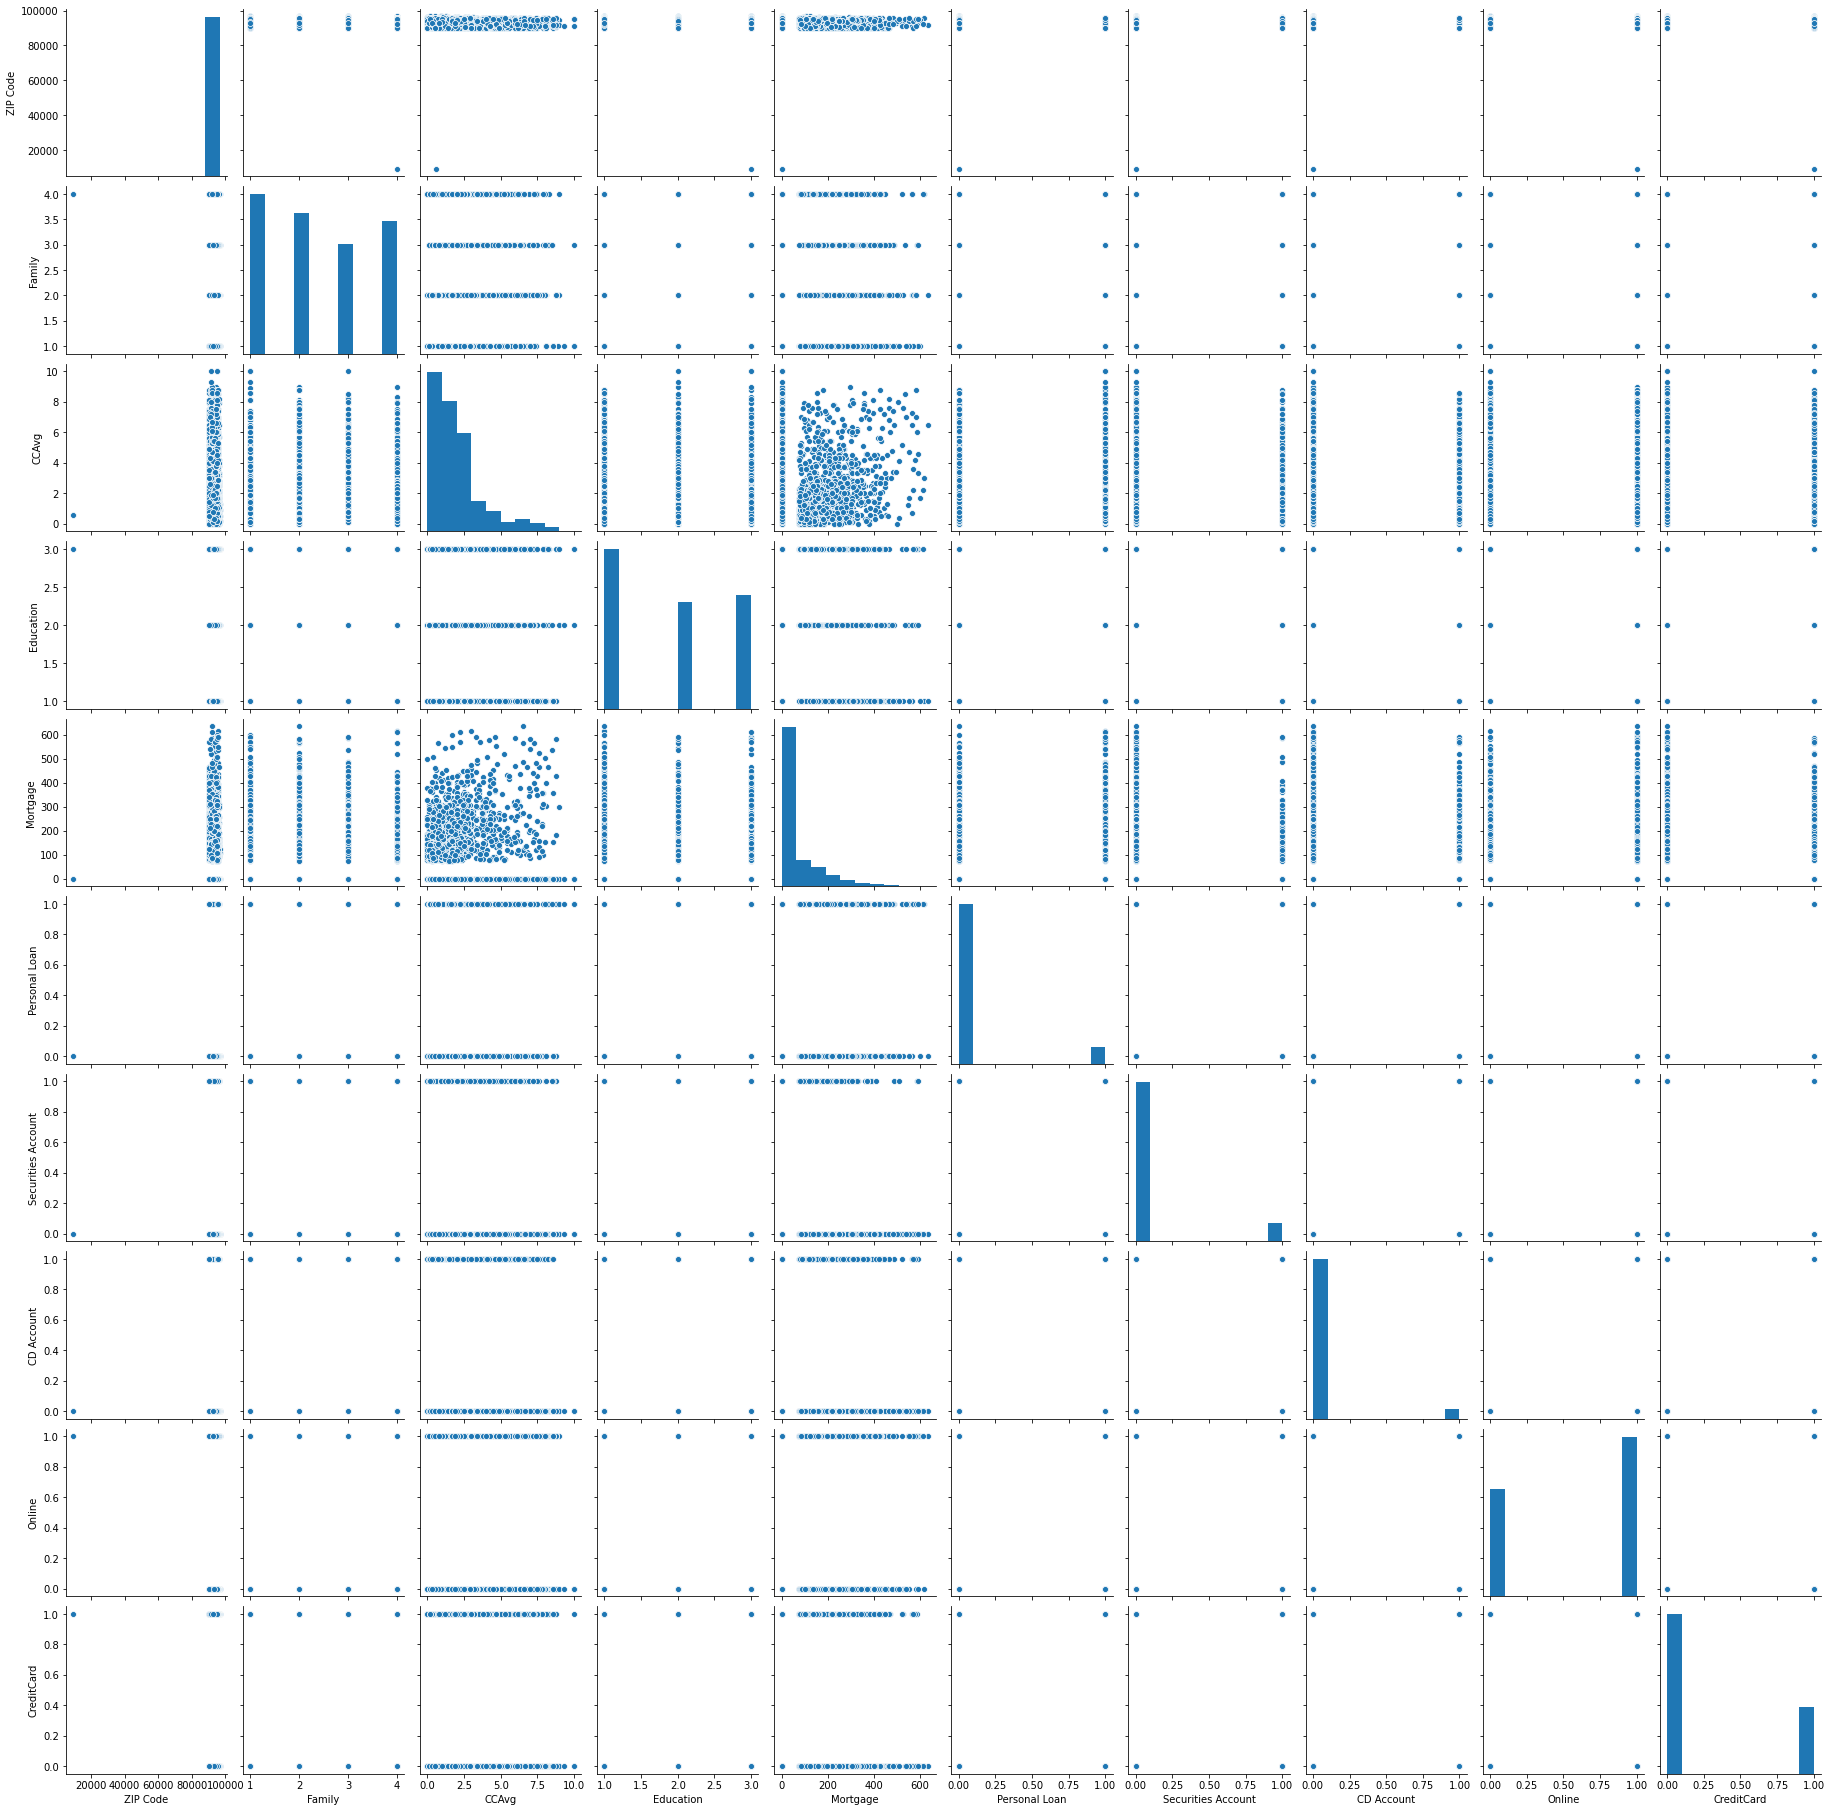

In [ ]:
sns.pairplot(model.iloc[:,4:])

**3.2  Number of people with zero mortgage**

---



In [ ]:
print('Number of people with zero mortgage:',len(model[model['Mortgage']==0]))


Number of people with zero mortgage: 3462


**3.3 Number of people with zero credit card spending per month**

---



In [ ]:
print('Number of people with zero Credit Card spending per month:', len(model[model['CCAvg']==0]))

Number of people with zero Credit Card spending per month: 106


**3.4 Value counts of all categorical columns.**

---



In [ ]:

categorical_columns = ['CCAvg', 'Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard', 'Personal Loan']

for column in categorical_columns:
    print(f'Value counts for {column} column:')
    print(model[column].value_counts())
    print()

Value counts for CCAvg column:
0.30    241
1.00    231
0.20    204
2.00    188
0.80    187
       ... 
2.75      1
8.20      1
9.30      1
3.67      1
5.33      1
Name: CCAvg, Length: 108, dtype: int64

Value counts for Family column:
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

Value counts for Education column:
1    2096
3    1501
2    1403
Name: Education, dtype: int64

Value counts for Securities Account column:
0    4478
1     522
Name: Securities Account, dtype: int64

Value counts for CD Account column:
0    4698
1     302
Name: CD Account, dtype: int64

Value counts for Online column:
1    2984
0    2016
Name: Online, dtype: int64

Value counts for CreditCard column:
0    3530
1    1470
Name: CreditCard, dtype: int64

Value counts for Personal Loan column:
0    4520
1     480
Name: Personal Loan, dtype: int64



**3.5 Univariate and Bivariate analysis**


---





*3.5.1 Univiariate Analysis*

---



---



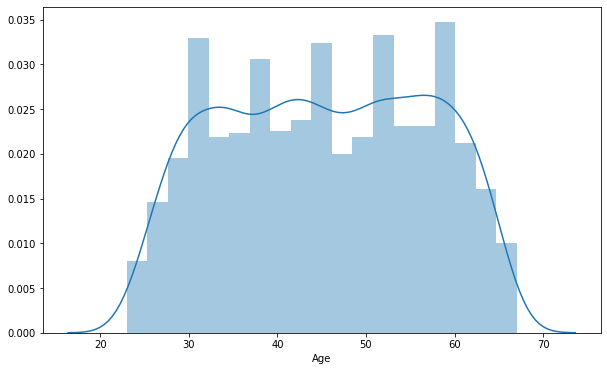

In [ ]:
sns.distplot(model.Age)


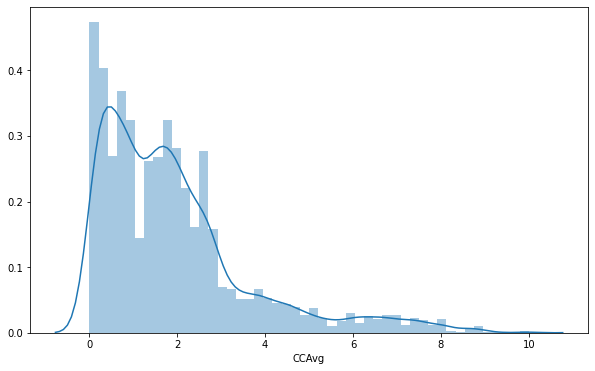

In [ ]:
sns.distplot(model.CCAvg)

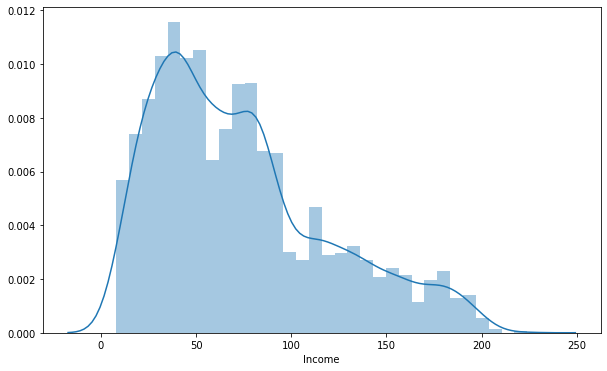

In [ ]:
sns.distplot(model.Income)

(array([3462.,  566.,  428.,  254.,  127.,   73.,   46.,   20.,   14.,
          10.]),
 array([  0. ,  63.5, 127. , 190.5, 254. , 317.5, 381. , 444.5, 508. ,
        571.5, 635. ]),
 <a list of 10 Patch objects>)

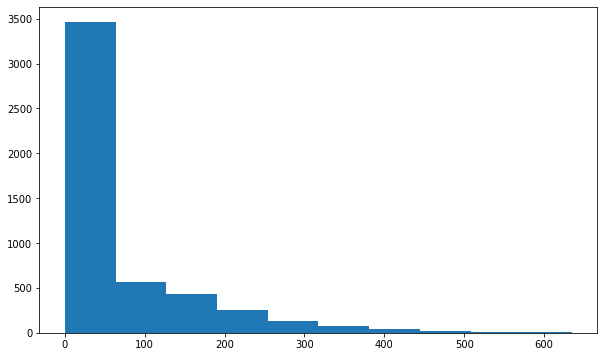

In [ ]:
plt.hist(model.Mortgage)

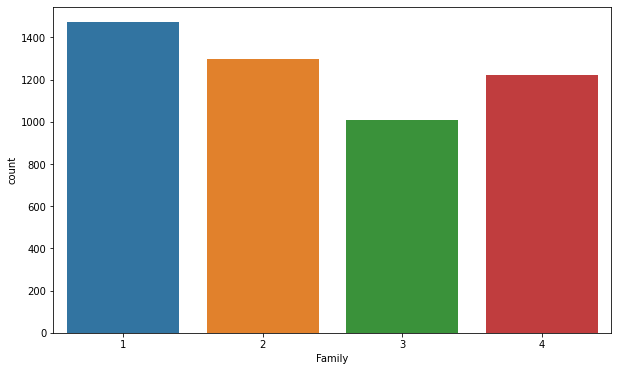

In [ ]:
sns.countplot(model.Family)

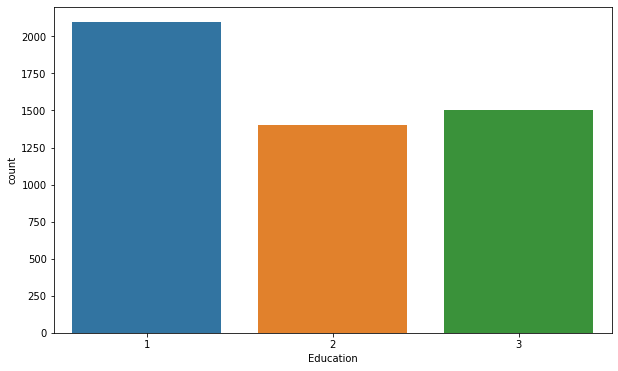

In [ ]:
sns.countplot(model.Education)

*3.5.2 Bivariate analysis*

---



---



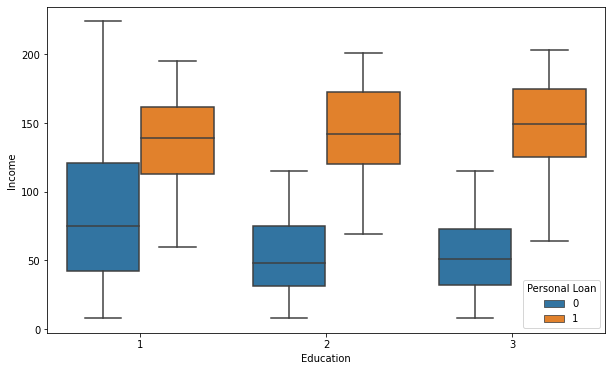

In [ ]:
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=model)

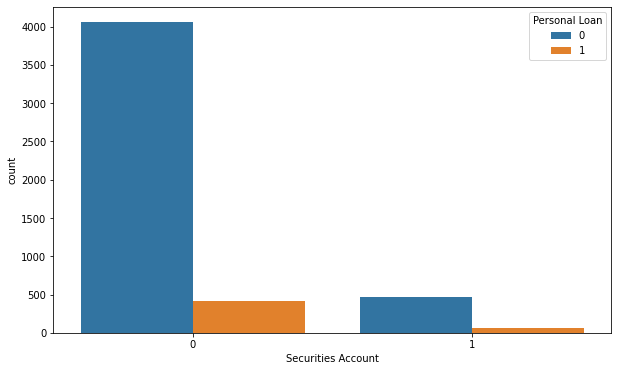

In [ ]:
sns.countplot(x="Securities Account", data=model,hue="Personal Loan")

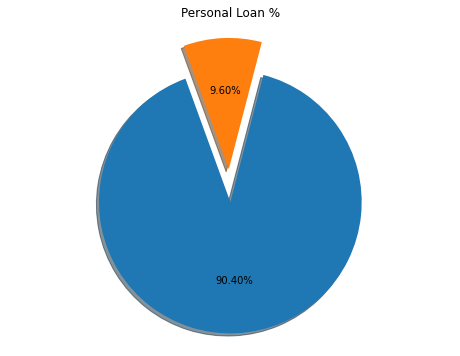

In [ ]:
Data=pd.DataFrame(model['Personal Loan'].value_counts()).reset_index()
Data.columns=['Labels','Personal Loan']
fig1,ax1=plt.subplots(figsize=(8,6))
explode=(0,0.25)
ax1.pie(Data['Personal Loan'],explode=explode,autopct='%1.2f%%',shadow=True,startangle=110)
ax1.axis('equal')
plt.title('Personal Loan %')
plt.show()

In [ ]:
corr = model.corr()

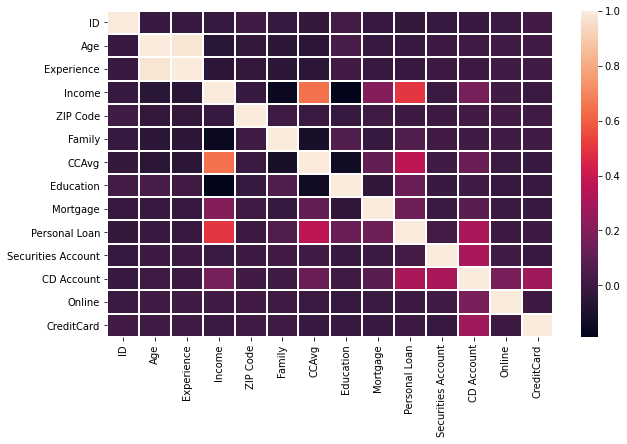

In [ ]:
sns.heatmap(corr, linewidths=1)

### ***4. Apply necessary transformations for the feature variables***


In [ ]:
model.drop(['ID','ZIP Code'], axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
columns_to_scale = ['Age', 'Family', 'Income', 'Education', 'CCAvg',  'Mortgage']

for column in columns_to_scale:
    scaler = MinMaxScaler()
    model[column] = scaler.fit_transform(model[column].values.reshape(-1, 1))
    
model.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,0.045455,1.0,0.189815,1.000000,0.16,0.0,0.0,0,1,0,0,0
1,0.500000,19.0,0.120370,0.666667,0.15,0.0,0.0,0,1,0,0,0
2,0.363636,15.0,0.013889,0.000000,0.10,0.0,0.0,0,0,0,0,0
3,0.272727,9.0,0.425926,0.000000,0.27,0.5,0.0,0,0,0,0,0
4,0.272727,8.0,0.171296,1.000000,0.10,0.5,0.0,0,0,0,0,1


In [ ]:
X = model.drop(['Personal Loan'], axis=1)
y = model['Personal Loan'].values

X.shape, y.shape

((5000, 11), (5000,))

### ***5. Normalise data and split the data into training and test set in the ratio of 70:30 respectively***

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify= y,random_state=17)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3500, 11), (1500, 11), (3500,), (1500,))

In [ ]:
class_names = ['wont take loan', 'take loan']

### ***6. Use the Logistic Regression model to predict the likelihood of a customer buying personal loans.***

### ***7. Printing all the metrics related for evaluating the model performance***



**LOGISTIC REGGRESION**

---



In [ ]:
log_reg = LogisticRegression(C=1.0, max_iter=200)
log_reg.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, plot_confusion_matrix, plot_roc_curve, roc_auc_score
from sklearn.metrics import plot_precision_recall_curve

Logistic Regression Results: 
Training Accuracy: 0.95
Testing Accuracy: 0.96
Precision: 0.89
Recall: 0.63


Text(0.5, 1.0, 'Precision-Recall Curve for Logistic Regression')

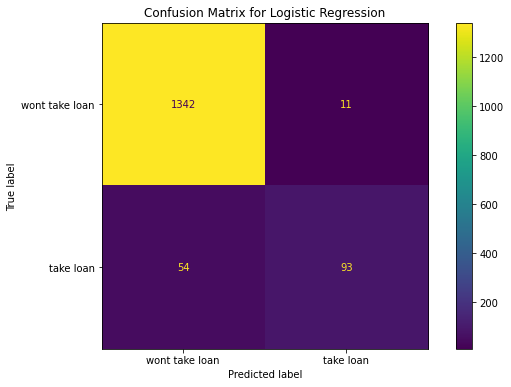

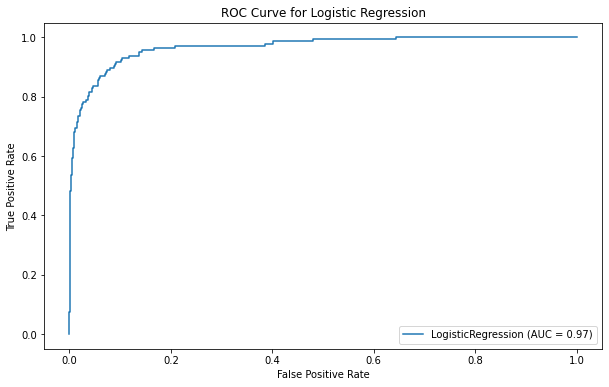

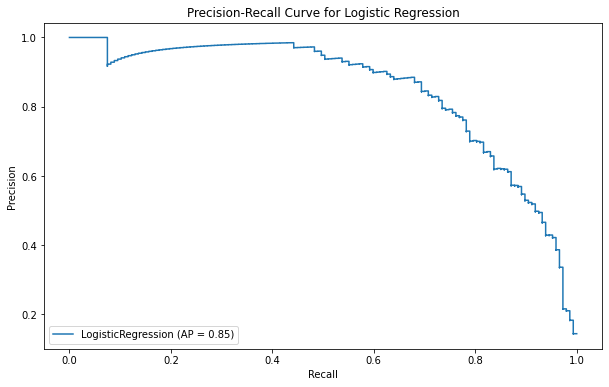

In [ ]:
print('Logistic Regression Results: ')

train_score = log_reg.score(X_train, y_train)
print('Training Accuracy:', train_score.round(2))
test_score = log_reg.score(X_test, y_test)
print('Testing Accuracy:', test_score.round(2))

y_pred_logi = log_reg.predict(X_test)

precision_logi = precision_score(y_test, y_pred_logi, labels=class_names).round(2)
print('Precision:', precision_logi)
recall_logi = recall_score(y_test, y_pred_logi).round(2)
print('Recall:', recall_logi)

plot_confusion_matrix(log_reg, X_test, y_test, display_labels=class_names, values_format='d')
plt.title('Confusion Matrix for Logistic Regression')

plot_roc_curve(log_reg, X_test, y_test)
plt.title('ROC Curve for Logistic Regression')

plot_precision_recall_curve(log_reg, X_test, y_test)
plt.title('Precision-Recall Curve for Logistic Regression')

### ***8. Build various other classification algorithms and compare their performance***


 **SUPPORT VECTOR MACHINE (SVM)**

---



In [ ]:
from sklearn import svm
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
sv= svm.SVC(kernel='linear',C=5)
sv.fit(X_train,y_train)

SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
pred_test = sv.predict(X_test)
pred_train = sv.predict(X_train)

In [ ]:
acc_Xtest= accuracy_score(y_test,pred_test)
acc_Xtrain= accuracy_score(y_train,pred_train)
print('Accuracy on the X_train is : {:.4f}' .format(acc_Xtrain))
print('Accuracy on the X_test is : {:.4f}' .format(acc_Xtest))

Accuracy on the X_train is : 0.9523
Accuracy on the X_test is : 0.9540


In [ ]:
cm = metrics.confusion_matrix(y_test,pred_test)
print(cm)

[[1339   13]
 [  56   92]]


              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1352
           1       0.88      0.62      0.73       148

    accuracy                           0.95      1500
   macro avg       0.92      0.81      0.85      1500
weighted avg       0.95      0.95      0.95      1500



Text(0.5, 1.0, 'Confusion Matrix for SVM')

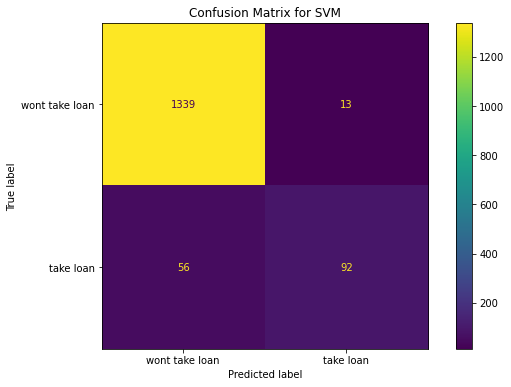

In [ ]:
print(classification_report(y_test,pred_test))

plot_confusion_matrix(sv, X_test, y_test, display_labels=class_names, values_format='d')
plt.title('Confusion Matrix for SVM')

Recall:  0.6216216216216216
Precision:  0.8761904761904762
F1 Score:  0.7272727272727273
roc_auc_score:  0.8060031185031185


Text(0.5, 1.0, 'Precision-Recall SVM')

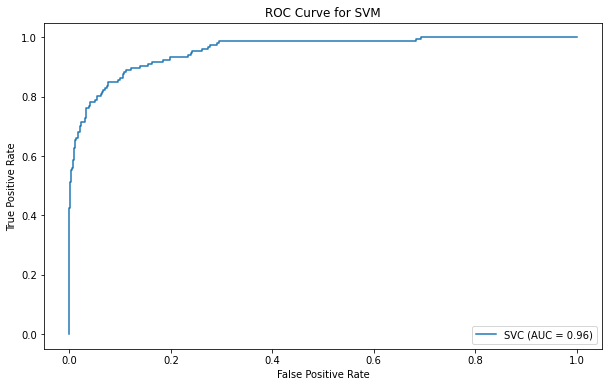

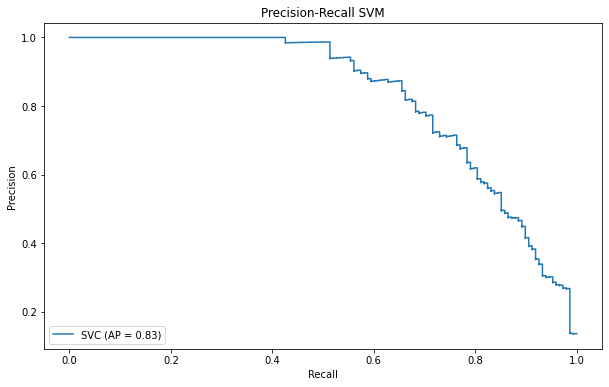

In [ ]:
print('Recall: ',recall_score(y_test,pred_test))
print('Precision: ',precision_score(y_test,pred_test))
print('F1 Score: ',f1_score(y_test,pred_test))
print('roc_auc_score: ',roc_auc_score(y_test,pred_test))

plot_roc_curve(sv, X_test, y_test)
plt.title('ROC Curve for SVM')

plot_precision_recall_curve(sv, X_test, y_test)
plt.title('Precision-Recall SVM')

**RANDOM FOREST CLASSIFIER**

---




In [ ]:
rac = RandomForestClassifier(n_estimators=300, max_depth=7,n_jobs=-1 )
rac.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

Random Forest Classifier Results: 
Training Accuracy: 0.99
Testing Accuracy: 0.99
Precision: 0.98
Recall: 0.92


Text(0.5, 1.0, 'Precision-Recall Random Forest Classifier')

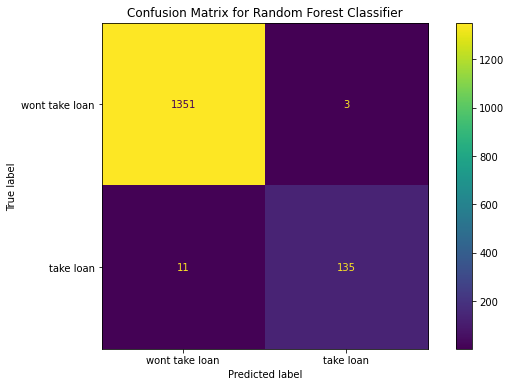

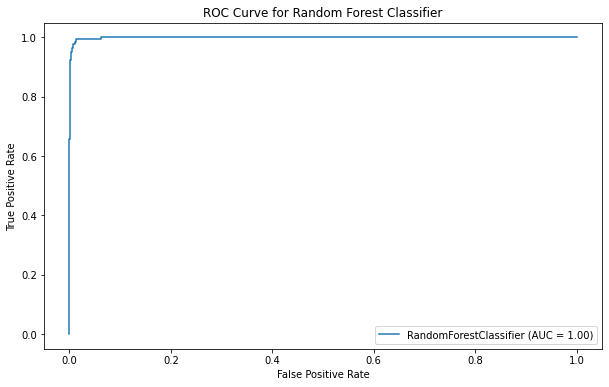

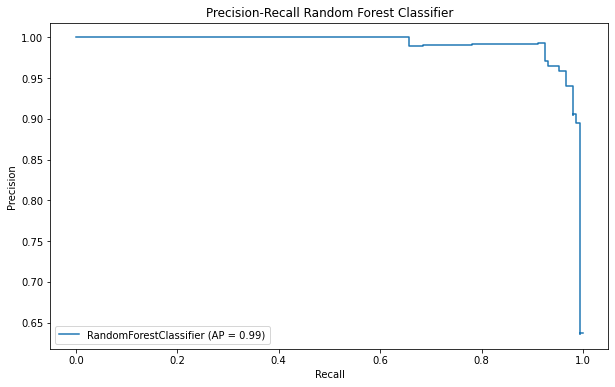

In [ ]:
print('Random Forest Classifier Results: ')

train_score = rac.score(X_train, y_train)
print('Training Accuracy:', train_score.round(2))
test_score = rac.score(X_test, y_test)
print('Testing Accuracy:', test_score.round(2))

y_pred_rf = rac.predict(X_test)

precision_rf = precision_score(y_test, y_pred_rf, labels=class_names).round(2)
print('Precision:', precision_rf)
recall_rf = recall_score(y_test, y_pred_rf).round(2)
print('Recall:', recall_rf)

plot_confusion_matrix(rac, X_test, y_test, display_labels=class_names, values_format='d')
plt.title('Confusion Matrix for Random Forest Classifier')

plot_roc_curve(rac, X_test, y_test)
plt.title('ROC Curve for Random Forest Classifier')

plot_precision_recall_curve(rac, X_test, y_test)
plt.title('Precision-Recall Random Forest Classifier')

**DECISION TREE**

---



In [ ]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

In [ ]:
#feature Scaling
classifier= DecisionTreeClassifier(random_state=0, max_depth=8)
classifier.fit(X_train,y_train)

#predicting on training and test data
y_train_pred = classifier.predict(X_train)
y_test_pred= classifier.predict(X_test)

In [ ]:
pred_test = classifier.predict(X_test)
pred_train = classifier.predict(X_train)

In [ ]:
cm = metrics.confusion_matrix(y_test,pred_test)
print(cm)

[[1341   13]
 [  22  124]]


In [ ]:
acc_Xtest= accuracy_score(y_test,pred_test)
acc_Xtrain= accuracy_score(y_train,pred_train)
print('Accuracy on the X_train is : {:.4f}' .format(acc_Xtrain))
print('Accuracy on the X_test is : {:.4f}' .format(acc_Xtest))

Accuracy on the X_train is : 0.9980
Accuracy on the X_test is : 0.9767


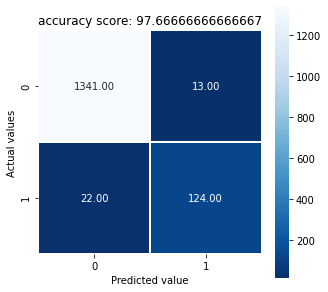

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True,fmt='.2f',linewidth=0.5,square=True,cmap='Blues_r')
plt.xlabel('Predicted value')
plt.ylabel('Actual values')
all_sampl_title= 'accuracy score: {0}' .format(acc_Xtest*100)
plt.title(all_sampl_title);


In [ ]:
print('Recall: ',recall_score(y_test,pred_test))
print('Precision: ',precision_score(y_test,pred_test))
print('F1 Score: ',f1_score(y_test,pred_test))
print('ROC_AUC Score: ',roc_auc_score(y_test,pred_test))

Recall:  0.8493150684931506
Precision:  0.9051094890510949
F1 Score:  0.8763250883392226
ROC_AUC Score:  0.9198569434046254


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1354
           1       0.91      0.85      0.88       146

    accuracy                           0.98      1500
   macro avg       0.94      0.92      0.93      1500
weighted avg       0.98      0.98      0.98      1500



# ***9. Give a business understanding of your model***


### **The classification goal is to predict the likelihood of a liability customer buying personal loans.**

***Content:***

1. Intro
2. Problem statement
3. Python libraries
4. Independent and dependent variable
5. Classification Algorithms Used
6. Interpretation
7. Conclusion


###1. INTRODUCTION

This is about a bank which has a growing customer base. The bank wants to increase borrowers (asset customers) base to bring in more loan business and earn more through the interest on loans. So , the bank wants to convert the liability based customers to personal loan customers (while retaining them as depositors).

 A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. Now the department wants us to build a model that will help the bank identify the potential customers who have a higher probability of purchasing the loan. 
 
 This will increase the success ratio while at the same time also reduces the cost of the campaign.


###2. PROBLEM STATEMENT

The main aim of this model is to predicting the way to explore ways of converting its liability customers (depositors) to personal loan customers (while retaining them as depositors) using some continous and discrete variable data. 

Finding relationship or dependency of Personal Loan on attrubutes like Income, Age ,Experience etc.

###3. PYTHON LIBRARIES

- Numpy

- Pandas

- Matplotlib

- Seaborn

- Scikit-Learn

###4. Independent and dependent variable

* Independent variable

Independent variable (X) = Feature variable = Predictor variable

The following are the independent variable:-

1. ID : Customer ID
2. Age : Customer's age in completed years
3. Experience : years of professional experience
4. Income : Annual income of the customer ( 000)
5. ZIPCode:HomeAddressZIPcode.
6. Family:Familysizeofthecustomer
7. CCAvgAvg.:spendingoncreditcardspermonth( 000)
8. Education : Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
9. Mortgage : Value of house mortgage if any. ($000)
10. Securities Account : Does the customer have a securities account with the bank?
11. CD Account : Does the customer have a certificate of deposit (CD) account with the bank?
12. Online : Does the customer use internet banking facilities?
13. CreditCard :Does the customer use a credit card issued by UniversalBank?


* Dependent variable

Dependent variable (y) = Target variable = Response variable

The following is the dependent variable:-

Personal Loan :Did this customer accept the personal loan offered in the last campaign?


###5. CLASSIFICATION ALGORITHMS USED

Logistic Regression

Support Vector Machine (SVM)

Random Forest Classifier

Decision Tree

###6. INTERPRETATION

* Logistic Regression

Training Accuracy: 0.95

Testing Accuracy: 0.96

Precision: 0.89

Recall: 0.63

* Support Vector Machine (SVM)

Training Accuracy : 0.9523

Testing Accuracy : 0.9540

Precision: 0.8761904761904762

Recall: 0.6216216216216216

* Random Forest Classifier

Training Accuracy: 0.99

Testing Accuracy: 0.99

Precision: 0.98

Recall: 0.92

* Decision Tree

Training Accuracy : 0.9980

Testing Accuracy : 0.9767

Precision: 0.9051094890510949

Recall: 0.8493150684931506



###7. CONCLUSION

We have implemented 5 classifier models.

From the above implemented classifiers RandomForestClassifier is the best model to predict ikelihood of a liability customer buying personal loans with 99% training and testing accuracy.
